## Data Visualisation Script

### Set working directory

In [2]:
import os
print(os.getcwd())

C:\Users\filot\OneDrive - University of Strathclyde\Diss\jupyter


In [3]:
os.chdir('C:/Users/filot/OneDrive - University of Strathclyde/Diss')

In [9]:
#importing libraries
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np

### **Part1** - not large enough

 **Data type:** ERA5 hourly reanalysis data
 
 **Domain:** -9.2; -9; 39.5; 39.6
 
 **Time:** hourly 01/01/2022-30/06/2022
 
 **Parameters:** Mean wave direction, Peak wave period, Significant height of total swell

In [66]:
ds1 = xr.open_dataset("data/part1/data_stream-wave_stepType-instant.nc")

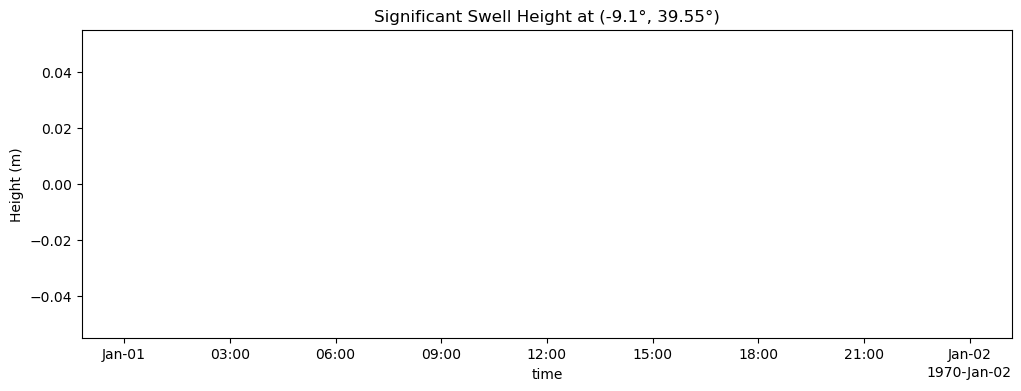

In [67]:
point1 = ds1.sel(longitude=-9.2, latitude=39.5, method="nearest")

fig, ax = plt.subplots(figsize=(12, 4))
point1["mwd"].plot(ax=ax)
ax.set_title("Significant Swell Height at (-9.1°, 39.55°)")
ax.set_ylabel("Height (m)")
plt.show()

### **Part3**

 **Data type:** ERA5 hourly reanalysis data
 
 **Domain:** -10; -9; 40; 39
 
 **Time:** hourly 01/01/2022-30/04/2022
 
 **Parameters:** 
Significant height of combined wind waves and swell (swh), Significant height of total swell (shts), Significant height of wind waves (shww)

In [70]:
ds3 = xr.open_dataset("data/part3/data_stream-wave_stepType-instant.nc")
print(ds3)

<xarray.Dataset> Size: 380kB
Dimensions:     (valid_time: 2880, latitude: 3, longitude: 3)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 23kB 2022-01-01 ... 2022-04-30T23...
  * latitude    (latitude) float64 24B 40.0 39.5 39.0
  * longitude   (longitude) float64 24B -10.0 -9.5 -9.0
    expver      (valid_time) <U4 46kB ...
Data variables:
    swh         (valid_time, latitude, longitude) float32 104kB ...
    shts        (valid_time, latitude, longitude) float32 104kB ...
    shww        (valid_time, latitude, longitude) float32 104kB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-07-06T19:57 GRIB to CDM+CF via cfgrib-0.9.1...


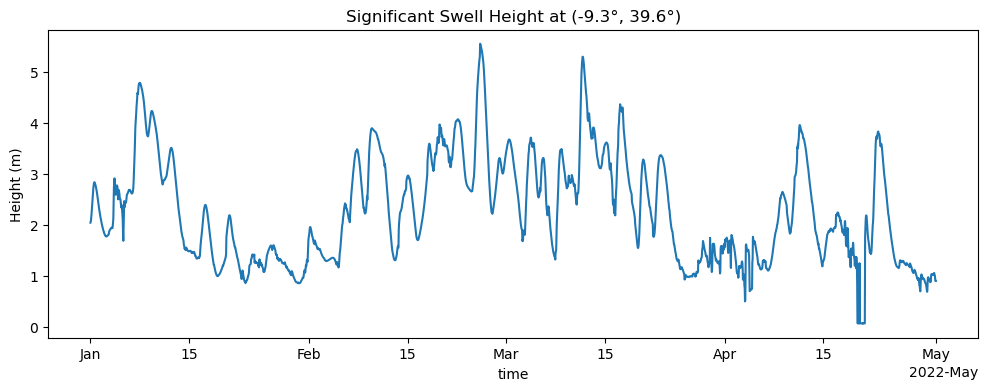

In [71]:
point3 = ds3.sel(latitude=39.6, longitude=-9.3, method="nearest")

fig, ax = plt.subplots(figsize=(12, 4))
point3["shts"].plot(ax=ax)
ax.set_title("Significant Swell Height at (-9.3°, 39.6°)")
ax.set_ylabel("Height (m)")
plt.show()

In [52]:
# Praia do Norte coordinates
lat_pt = 39.605
lon_pt = -9.276

# Subset to nearest grid point
point3 = ds.sel(latitude=lat_pt, longitude=lon_pt, method="nearest")

# Print available time values (optional check)
#print(point.valid_time[:5])

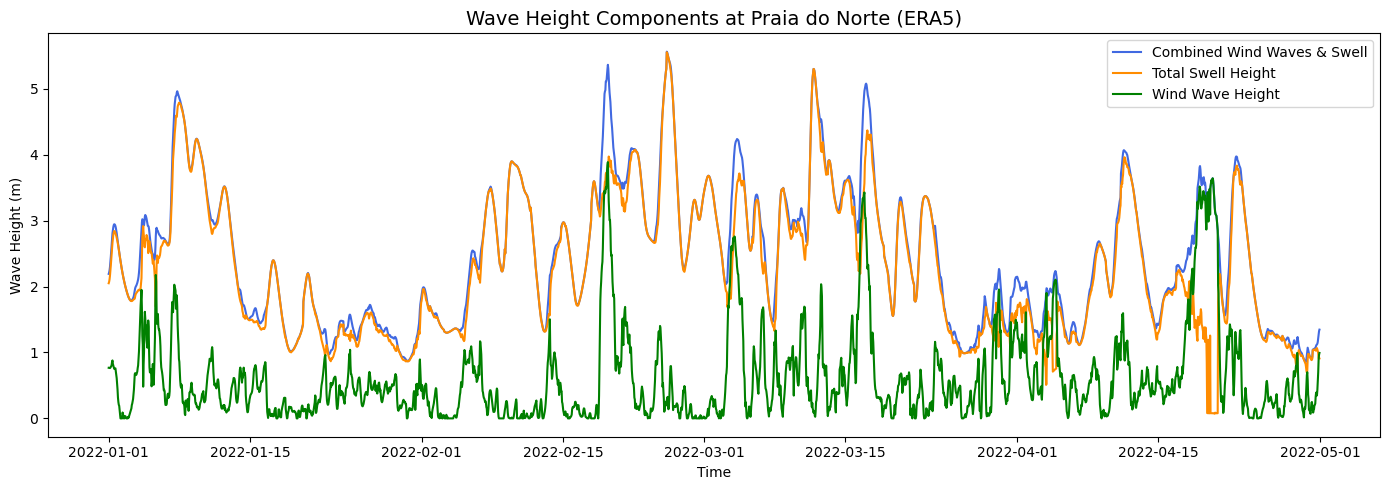

In [72]:
# Plot
plt.figure(figsize=(14, 5))

# Replace variable names below with the correct ones from your dataset
plt.plot(point3.valid_time, point3['swh'], label="Combined Wind Waves & Swell", color='royalblue')
plt.plot(point3.valid_time, point3['shts'], label="Total Swell Height", color='darkorange')
plt.plot(point3.valid_time, point3['shww'], label="Wind Wave Height", color='green')

plt.title("Wave Height Components at Praia do Norte (ERA5)", fontsize=14)
plt.xlabel("Time")
plt.ylabel("Wave Height (m)")
#plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### **Part4**

 **Data type:** ERA5 hourly reanalysis data
 
 **Domain:** -10; -9; 40; 39
 
 **Time:** hourly 01/01/2022-31/12/2022
 
 **Parameters:** Maximum individual wave height (hmax)

In [73]:
ds4 = xr.open_dataset("data/part4/data_stream-wave_stepType-instant.nc")
print(ds4)

<xarray.Dataset> Size: 526kB
Dimensions:     (valid_time: 8760, latitude: 3, longitude: 3)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 70kB 2022-01-01 ... 2022-12-31T23...
  * latitude    (latitude) float64 24B 40.0 39.5 39.0
  * longitude   (longitude) float64 24B -10.0 -9.5 -9.0
    expver      (valid_time) <U4 140kB ...
Data variables:
    hmax        (valid_time, latitude, longitude) float32 315kB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-07-06T21:40 GRIB to CDM+CF via cfgrib-0.9.1...


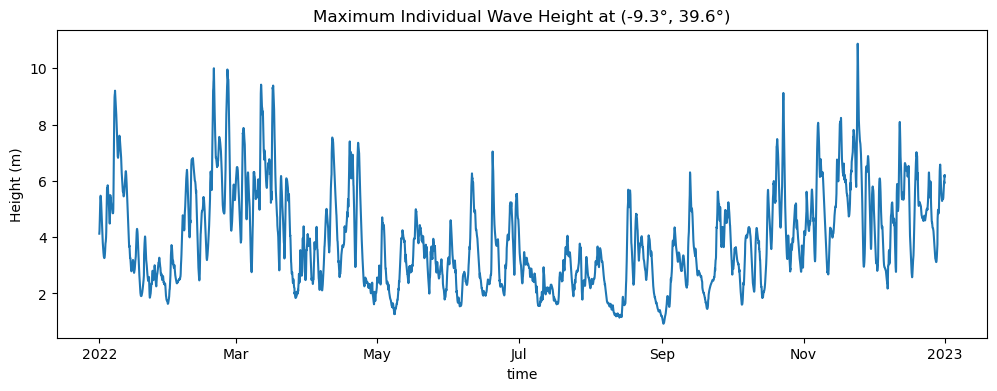

In [108]:
point4 = ds4.sel(latitude=39.6, longitude=-9.3, method="nearest")

fig, ax = plt.subplots(figsize=(12, 4))
point4["hmax"].plot(ax=ax)
ax.set_title("Maximum Individual Wave Height at (-9.3°, 39.6°)")
ax.set_ylabel("Height (m)")
plt.show()

### Plotting part3 and part4 data together

In [78]:
point5 = point4.sel(valid_time=slice("2022-01-01", "2022-04-30"))

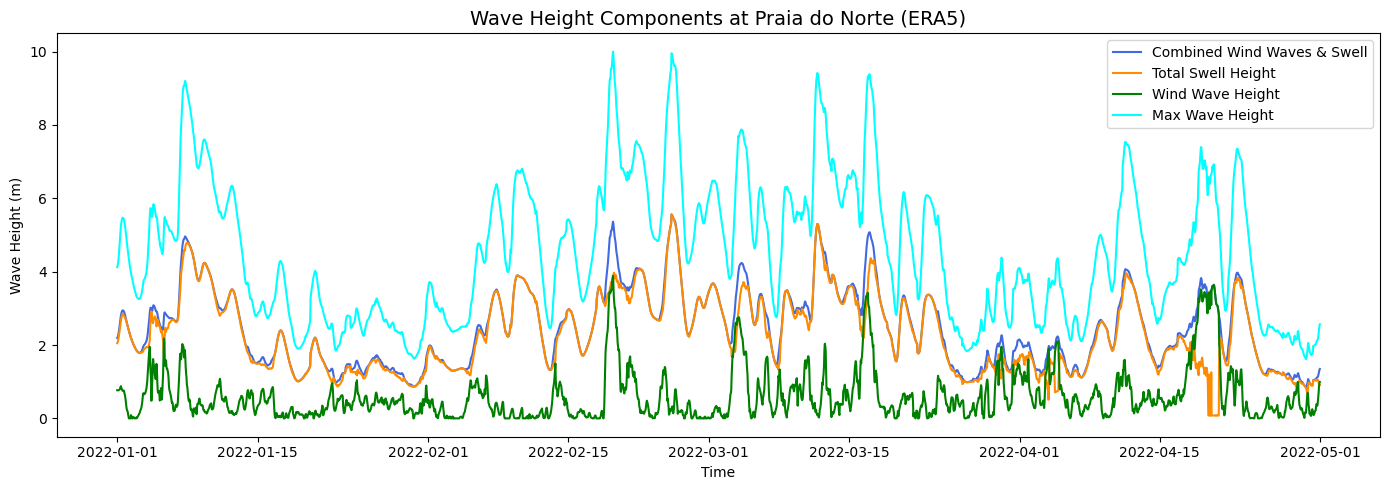

In [79]:
# Plot
plt.figure(figsize=(14, 5))

plt.plot(point3.valid_time, point3['swh'], label="Combined Wind Waves & Swell", color='royalblue')
plt.plot(point3.valid_time, point3['shts'], label="Total Swell Height", color='darkorange')
plt.plot(point3.valid_time, point3['shww'], label="Wind Wave Height", color='green')
plt.plot(point5.valid_time, point5['hmax'], label="Max Wave Height", color='cyan')

plt.title("Wave Height Components at Praia do Norte (ERA5)", fontsize=14)
plt.xlabel("Time")
plt.ylabel("Wave Height (m)")
#plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### visualize map

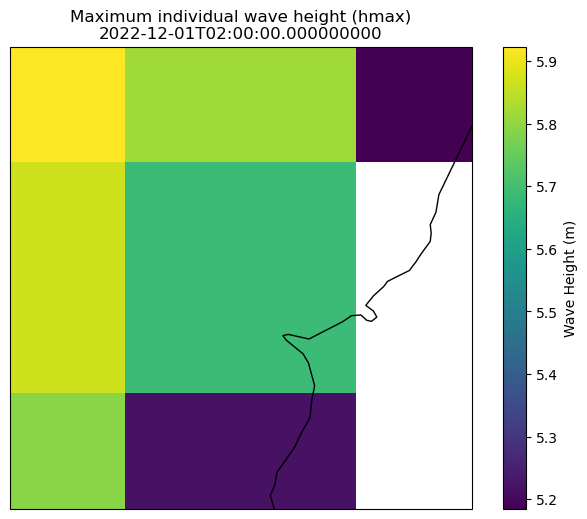

In [105]:
time_slice = "2022-12-01T02:00:00.000000000"

fig, ax = plt.subplots(figsize=(8, 6), subplot_kw={'projection': ccrs.PlateCarree()})
ds4["hmax"].sel(valid_time=time_slice).plot.pcolormesh(
    ax=ax, cmap="viridis", shading="auto", cbar_kwargs={'label': 'Wave Height (m)'}
)
ax.set_title(f"Maximum individual wave height (hmax)\n{time_slice}")
ax.coastlines()
ax.set_extent([-10, -9, 40, 39])
plt.show()

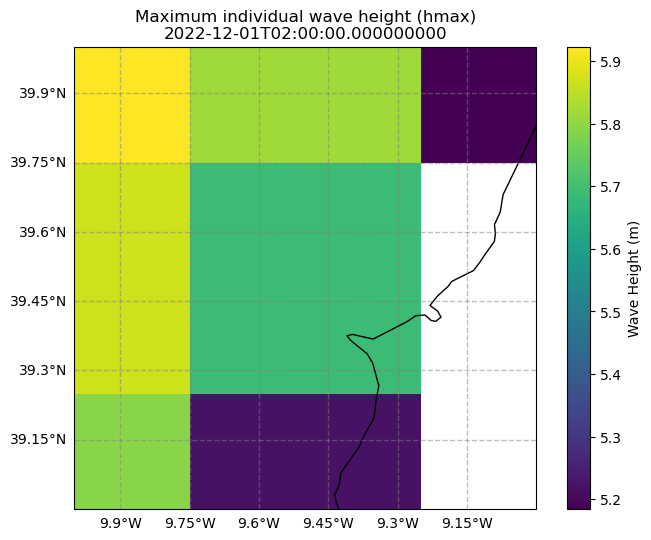

In [126]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

time_slice = "2022-12-01T02:00:00.000000000"

fig, ax = plt.subplots(figsize=(8, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot the data
ds4["hmax"].sel(valid_time=time_slice).plot.pcolormesh(
    ax=ax,
    cmap="viridis",
    shading="auto",
    cbar_kwargs={'label': 'Wave Height (m)'}
)

# Add map details
ax.set_title(f"Maximum individual wave height (hmax)\n{time_slice}")
ax.coastlines()
ax.set_extent([-10, -9, 39, 40])  # (lon_min, lon_max, lat_min, lat_max)

# Add lat/lon gridlines
gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 10}
#gl.ylabel


### **Part6**

 **Data type:** CMEMS hourly reanalysis data- Atlantic -Iberian Biscay Irish- Ocean Wave Reanalysis
 
 **Domain:** -10; -9; 40; 39
 
 **Time:** hourly 01/01/2022-31/12/2022
 
 **Parameters:** Maximum individual wave height (hmax)

In [109]:
ds6 = xr.open_dataset("data/cmems_mod_ibi_wav_my_0.027deg_PT1H-i_1752170265071.nc")
print(ds6)

<xarray.Dataset> Size: 45MB
Dimensions:    (time: 8736, latitude: 36, longitude: 36)
Coordinates:
  * time       (time) datetime64[ns] 70kB 2022-01-01 ... 2022-12-30T23:00:00
  * latitude   (latitude) float32 144B 39.0 39.03 39.06 ... 39.92 39.94 39.97
  * longitude  (longitude) float32 144B -10.0 -9.972 -9.944 ... -9.055 -9.027
Data variables:
    VCMX       (time, latitude, longitude) float32 45MB ...
Attributes:
    Conventions:       CF-1.11
    title:             CMEMS IBI MULTI-YEAR REANALYSIS: HOURLY WAVE PRODUCTS
    institution:       NOWSystems-MeteoFrance
    source:            MFWAM-CY47R1
    contact:           https://marine.copernicus.eu/contact
    references:        http://marine.copernicus.eu/
    comment:           
    subset:source:     ARCO data downloaded from the Marine Data Store using ...
    subset:productId:  IBI_MULTIYEAR_WAV_005_006
    subset:datasetId:  cmems_mod_ibi_wav_my_0.027deg_PT1H-i_202411
    subset:date:       2025-07-10T17:57:45.072Z


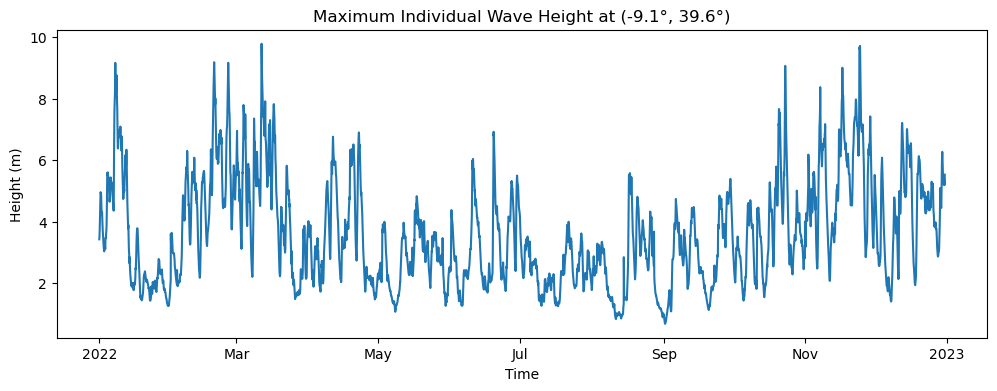

In [122]:
point6 = ds6.sel(latitude=39.6, longitude=-9.1, method="nearest")

fig, ax = plt.subplots(figsize=(12, 4))
point6["VCMX"].plot(ax=ax)
ax.set_title("Maximum Individual Wave Height at (-9.1°, 39.6°)")
ax.set_ylabel("Height (m)")
plt.show()

### visualize map

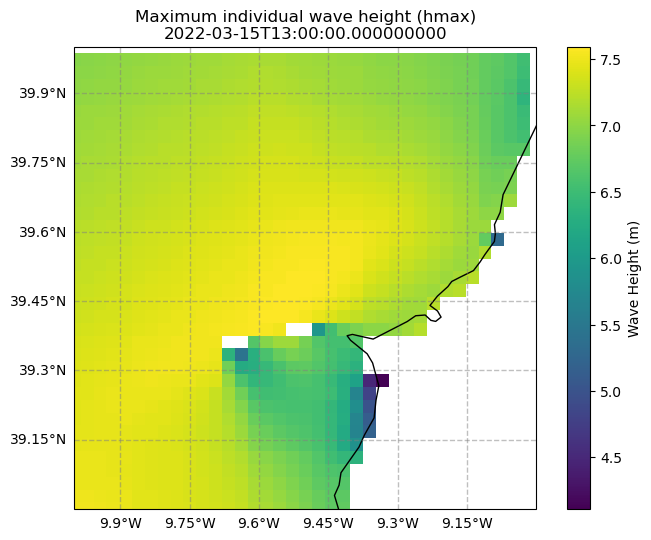

In [125]:
#import cartopy.crs as ccrs
#import matplotlib.pyplot as plt

time_slice = "2022-03-15T13:00:00.000000000"

fig, ax = plt.subplots(figsize=(8, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot the data
ds6["VCMX"].sel(time=time_slice).plot.pcolormesh(
    ax=ax,
    cmap="viridis",
    shading="auto",
    cbar_kwargs={'label': 'Wave Height (m)'}
)

# Add map details
ax.set_title(f"Maximum individual wave height (hmax)\n{time_slice}")
ax.coastlines()
ax.set_extent([-10, -9, 39, 40])  # (lon_min, lon_max, lat_min, lat_max)

# Add lat/lon gridlines
gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 10}
#gl.ylabel


### **Part7**

 **Data type:** CMEMS hourly reanalysis data- Atlantic -Iberian Biscay Irish- Ocean Wave Reanalysis
 
 **Domain:** -10; -9; 40; 39
 
 **Time:** hourly 01/01/2020-31/12/2020
 
 **Parameters:** Sea surface wave maximum height (VCMX)

In [5]:
ds7 = xr.open_dataset("data/part7.nc")
print(ds7)

<xarray.Dataset> Size: 46MB
Dimensions:    (time: 8784, latitude: 36, longitude: 36)
Coordinates:
  * time       (time) datetime64[ns] 70kB 2020-01-01 ... 2020-12-31T23:00:00
  * latitude   (latitude) float32 144B 39.0 39.03 39.06 ... 39.92 39.94 39.97
  * longitude  (longitude) float32 144B -10.0 -9.972 -9.944 ... -9.055 -9.027
Data variables:
    VCMX       (time, latitude, longitude) float32 46MB ...
Attributes:
    Conventions:       CF-1.11
    title:             CMEMS IBI MULTI-YEAR REANALYSIS: HOURLY WAVE PRODUCTS
    institution:       NOWSystems-MeteoFrance
    source:            MFWAM-CY47R1
    contact:           https://marine.copernicus.eu/contact
    references:        http://marine.copernicus.eu/
    comment:           
    subset:source:     ARCO data downloaded from the Marine Data Store using ...
    subset:productId:  IBI_MULTIYEAR_WAV_005_006
    subset:datasetId:  cmems_mod_ibi_wav_my_0.027deg_PT1H-i_202411
    subset:date:       2025-07-10T18:29:29.406Z


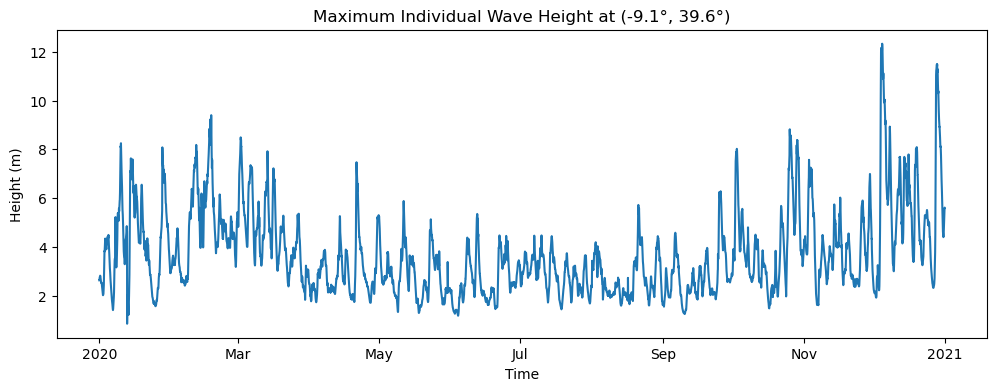

In [6]:
point7 = ds7.sel(latitude=39.6, longitude=-9.1, method="nearest")

fig, ax = plt.subplots(figsize=(12, 4))
point7["VCMX"].plot(ax=ax)
ax.set_title("Maximum Individual Wave Height at (-9.1°, 39.6°)")
ax.set_ylabel("Height (m)")
plt.show()

### visualize map

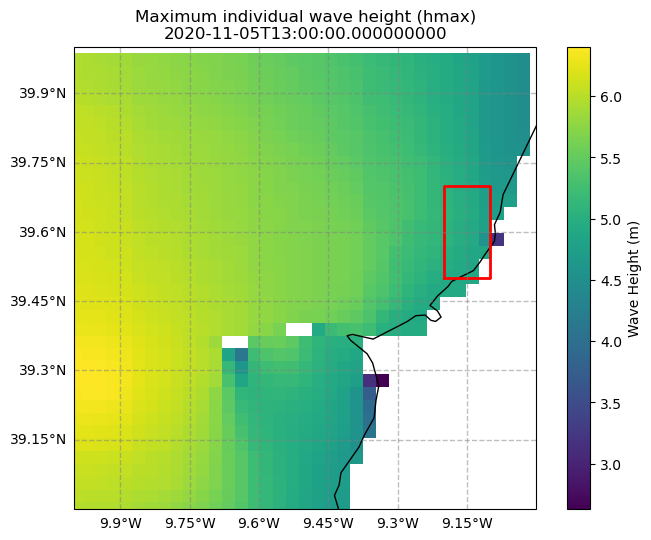

In [14]:
#import cartopy.crs as ccrs
#import matplotlib.pyplot as plt

time_slice = "2020-11-05T13:00:00.000000000"

fig, ax = plt.subplots(figsize=(8, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot the data
ds7["VCMX"].sel(time=time_slice).plot.pcolormesh(
    ax=ax,
    cmap="viridis",
    shading="auto",
    cbar_kwargs={'label': 'Wave Height (m)'}
)

# Overlay the region box
plt.plot([-9.2, -9.1, -9.1, -9.2, -9.2],
         [39.5, 39.5, 39.7, 39.7, 39.5],
         color='red', linewidth=2, label='Target Box')

# Add map details
ax.set_title(f"Maximum individual wave height (hmax)\n{time_slice}")
ax.coastlines()
ax.set_extent([-10, -9, 39, 40])  # (lon_min, lon_max, lat_min, lat_max)

# Add lat/lon gridlines
gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 10}
#gl.ylabel


### Find top 5 weeks with highets maximum wave heights

In [10]:
# Access the vcmx variable
vcmx = ds7['VCMX']  # Adjust if variable name is different

# Resample by week and get the maximum wave height per week (across time, lat, lon)
weekly_max = vcmx.resample(time='7D').max(dim=['time', 'latitude', 'longitude'])

# Sort by wave height descending and select top 5 weeks
top_weeks = weekly_max.sortby(weekly_max, ascending=False).isel(time=slice(0, 5))

# Print week start date and wave height
for t, val in zip(top_weeks['time'].values, top_weeks.values):
    print(f"Week starting {np.datetime_as_string(t, unit='D')}: {float(val):.2f} m")


Week starting 2020-12-02: 14.75 m
Week starting 2020-12-23: 13.15 m
Week starting 2020-02-12: 10.69 m
Week starting 2020-10-21: 9.92 m
Week starting 2020-01-22: 9.83 m


### Find top 5 days with highets maximum wave heights

In [19]:
# Access the vcmx variable
vcmx = ds7['VCMX']  # Adjust if variable name is different

# Resample by week and get the maximum wave height per week (across time, lat, lon)
daily_max = vcmx.resample(time='1D').max(dim=['time', 'latitude', 'longitude'])

# Sort by wave height descending and select top 5 weeks
top_days = daily_max.sortby(daily_max, ascending=False).isel(time=slice(0, 10))

# Print week start date and wave height
for t, val in zip(top_days['time'].values, top_days.values):
    print(f"Day {np.datetime_as_string(t, unit='D')}: {float(val):.2f} m")

Day 2020-12-04: 14.75 m
Day 2020-12-05: 13.69 m
Day 2020-12-28: 13.15 m
Day 2020-12-29: 11.95 m
Day 2020-12-06: 11.08 m
Day 2020-02-18: 10.69 m
Day 2020-02-17: 10.17 m
Day 2020-12-08: 10.05 m
Day 2020-10-25: 9.92 m
Day 2020-01-28: 9.83 m


### Visualize data at model domain

In [52]:
# Define decimal degree boundaries
lat_min = 39.5
lat_max = 39.7
lon_min = -9.3
lon_max = -9.06

# Slice the data
ds_ml = ds7.sel(latitude=slice(lat_min, lat_max),  # decreasing order if your lats are descending
                longitude=slice(lon_min, lon_max))  # increasing order for longitudes

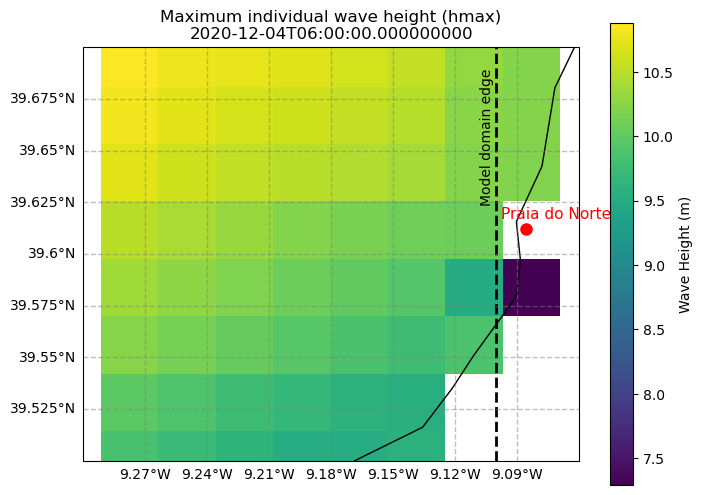

In [59]:
#import cartopy.crs as ccrs
#import matplotlib.pyplot as plt

time_slice = "2020-12-04T06:00:00.000000000"

fig, ax = plt.subplots(figsize=(8, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot the data
ds_ml["VCMX"].sel(time=time_slice).plot.pcolormesh(
    ax=ax,
    cmap="viridis",
    shading="auto",
    cbar_kwargs={'label': 'Wave Height (m)'}
)


# Add map details
ax.set_title(f"Maximum individual wave height (hmax)\n{time_slice}")
ax.coastlines()
ax.set_extent([lon_min, lon_max, lat_min, lat_max])


# Coordinates for Praia do Norte
praia_lon = -9.085556
praia_lat = 39.611944

# Plot the point
ax.plot(praia_lon, praia_lat,
        marker='o', color='red', markersize=8,
        transform=ccrs.PlateCarree())

# Add a label slightly offset from the point
ax.text(praia_lon-0.012, praia_lat+0.005,
        "Praia do Norte", color='red', fontsize=11,
        transform=ccrs.PlateCarree())

# Draw vertical line at model domain boundary (longitude = -9.1)
ax.plot([-9.1, -9.1], [lat_min, lat_max],
        color='black', linestyle='--', linewidth=2,
        transform=ccrs.PlateCarree(), label='Model Domain Limit (-9.1°)')

# Optional: Add label near the line
ax.text(-9.1 - 0.008, lat_max - 0.01, "Model domain edge", 
        color='black', fontsize=10, rotation=90,
        transform=ccrs.PlateCarree(), verticalalignment='top')

# Add lat/lon gridlines
gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 10}
#gl.ylabel
